# **AirPassenger**

###**Problem Statement**
We need to predict future airline passenger numbers using past data. The dataset has yearly data with the number of passengers recorded over time. Since the data shows trends and seasonal patterns, we use ARIMA and SARIMAX models to make accurate forecasts. These models help in planning and decision-making for airlines.

AirPassenger Dataset Link : https://drive.google.com/file/d/1nDdOM0ww0dM4vViMptnpIZhz63lVp23K/view?usp=sharing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/AirPassengers.csv")

In [ ]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.isnull().sum()
#in case we have null values then don't drop , perform mean imputation

,0
Month,0
#Passengers,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df["Month"]=pd.to_datetime(df["Month"])

In [ ]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.set_index("Month",inplace=True)

In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
# Let's check the components of Time Series

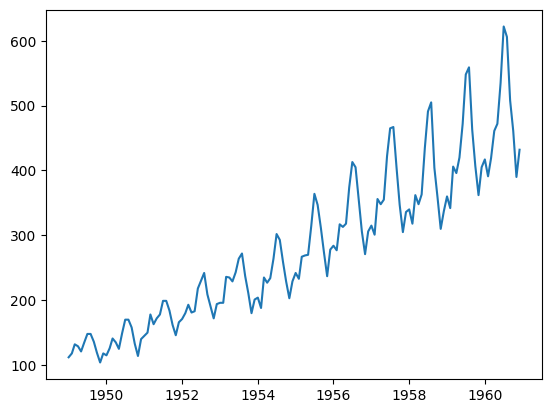

In [ ]:
plt.plot(df["#Passengers"])

1. Trend: The overall upward movement from left to right indicates a clear increasing trend.

2. Seasonality: The repeating, wave-like patterns each year suggest strong seasonality, with peaks and troughs occurring at regular intervals.

3. Residuals: Residuals are the random fluctuations or irregular variations that remain after accounting for trend and seasonality. In the graph:

* The data points don't perfectly follow the smooth seasonal pattern or trend line; instead, they deviate slightly up or down.

* These irregular deviations are the residuals, representing random noise, external factors, or model imperfections.

In [ ]:
# yes we do have a trend
# yes we have seasonality
# yes we do have residuals

In [ ]:
#Seasonal Decompose to check presence of the components
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose=seasonal_decompose(df["#Passengers"])

Figure(640x480)


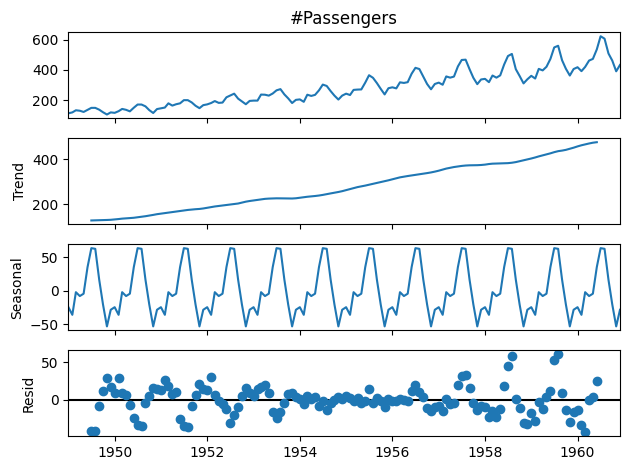

In [ ]:
print(decompose.plot())

In [ ]:
#Checking if the data is stationary or not
# using the ADF Test(Augumented - Dickey -Fuller Test)

# ADF Test
The ADF Test (Augmented Dickey-Fuller Test) is a statistical test used to check if a time series is stationary or not.

# 🚀 Why is Stationarity Important?
For many time series models like ARIMA, the data needs to be stationary, meaning:

* Constant mean over time
* Constant variance over time
* No strong seasonality or trends

Non-stationary data can lead to poor forecasting performance because models may struggle to capture trends and seasonality properly.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Null Hypothesis - Data is not stationary
# Alternate Hypothesis - Data is stationary

In [ ]:
result=adfuller(df["#Passengers"])
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

The ADF test output gives these values:

1. ADF Statistic (0.8153): Tells if the data is stationary. If it's less than critical values, the data is stationary. Here, it's not, so the data is non-stationary.

2. p-value (0.9918): If > 0.05, data is non-stationary. Here, it's 0.99, so the data is non-stationary.

3. Lags Used (13): Number of past values considered in the test.

4. Observations Used (130): Data points used after removing lags.

5. Critical Values: Thresholds at 1%, 5%, 10% to compare with the ADF statistic.

6. AIC (996.69): Helps choose the best lag length.

Conclusion: The data is non-stationary because the p-value is high and the ADF statistic is higher than critical values. ✅

In [ ]:
p_value=result[1]
p_value

0.991880243437641

In [ ]:
if p_value<=0.05:
  print("Null Hypothesis is rejected thus data is stationary")
else:
  print("Null Hypothesis is accepted, thus data is Non stationary")

Null Hypothesis is accepted, thus data is Non stationary


In [ ]:
# Checking stationarity visually
# by Checking for constant rolling mean and constant standard deviation


# Rolling mean (moving average)
The rolling mean (also called moving average) calculates the average of a specific number of data points (called the window) as it moves through the dataset.

# 📊 Example:
Data: [10, 20, 30, 40, 50, 60]

Window Size: 3 (means we'll calculate the average of every 3 numbers)

First Window (10, 20, 30):

* Average = (10 + 20 + 30) / 3 = 20

Second Window (20, 30, 40):

* Average = (20 + 30 + 40) / 3 = 30

Third Window (30, 40, 50):

* Average = (30 + 40 + 50) / 3 = 40

Fourth Window (40, 50, 60):

* Average = (40 + 50 + 60) / 3 = 50

In [ ]:
rolling_mean=df.rolling(window=12).mean()
rolling_std=df.rolling(window=12).std()

In [ ]:
rolling_mean.isnull().sum()

,0
#Passengers,11


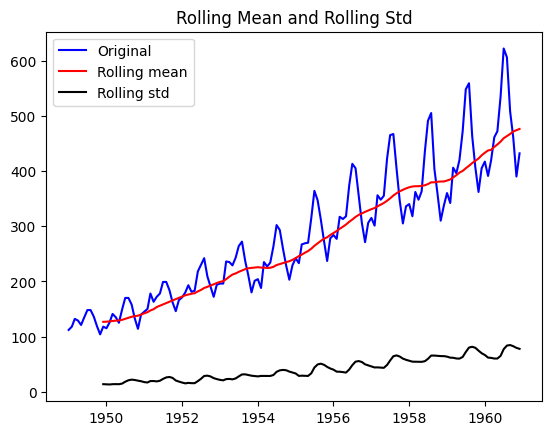

In [ ]:
plt.plot(df,color = 'blue',label = 'Original')
plt.plot(rolling_mean,color = 'red',label = 'Rolling mean')
plt.plot(rolling_std,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

#🚀 How Rolling Mean Smooths Data
The rolling mean smooths data by reducing short-term fluctuations (noise) and highlighting the overall trend.

# 🎯 Why It Works:
Instead of looking at each individual data point (which might go up and down rapidly), it calculates the average of a few points together. This reduces the effect of sudden spikes or drops because those extreme values get "averaged out.

In [ ]:
# Let's perform the log transformation to reduce the trend

# Log Transformation
Log Transformation is a technique where we apply the logarithm (usually log base 10 or natural log) to each data point in a dataset.

In Python: np.log(data) or np.log10(data)

###🔢 How Does It Work?
* It compresses large values more than small ones, reducing the gap between them.
* This makes big jumps in data less extreme, helping to flatten trends and stabilize variance.

###📊 Example:
Original Data: [10, 100, 1000, 10000]

Log Transformed Data (log10):

* log10(10) = 1
* log10(100) = 2
* log10(1000) = 3
* log10(10000) = 4

Notice how huge jumps in the original data become small steps after applying log.



### Why It Reduces Trends?
* Without Log: Trends grow exponentially (like sales, population, etc.).
* With Log: The exponential growth becomes linear, making it easier to model.

In [ ]:
log_df=np.log(df)

In [ ]:
log_df

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
rolling_mean=log_df.rolling(window=12).mean()
rolling_std=log_df.rolling(window=12).std()

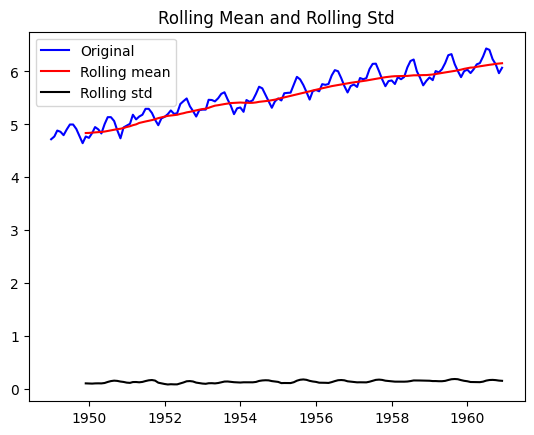

In [ ]:
plt.plot(log_df,color = 'blue',label = 'Original')
plt.plot(rolling_mean,color = 'red',label = 'Rolling mean')
plt.plot(rolling_std,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [ ]:


# Now still after transformation we can see the data is not stationary that is rolling mean and std is not constant thus we have to apply the differencing step

# Differencing
Difference=Current Value−Previous Value

### 🎯 Why It Helps with Stationarity?
* Trends cause data to increase or decrease over time.
* Differencing removes these trends because we’re focusing on the change between values rather than the values themselves.
* If the trend was upward, the differences would be more stable around a constant value.

# Example
Original Data (with Trend): [100, 110, 120, 130, 140] (Increasing trend)

First Difference:

* 110 - 100 = 10
* 120 - 110 = 10
* 130 - 120 = 10
* 140 - 130 = 10

Result after Differencing:

[NaN, 10, 10, 10, 10]

Now, the trend is gone, and the data is constant → This is stationary!

In [ ]:
#performing Differencing 1 time
diff_data=log_df.diff()
diff_data

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [ ]:
diff_data.dropna(inplace=True)

In [ ]:
diff_data

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [ ]:
rolling_mean=diff_data.rolling(window=12).mean()
rolling_std=diff_data.rolling(window=12).std()

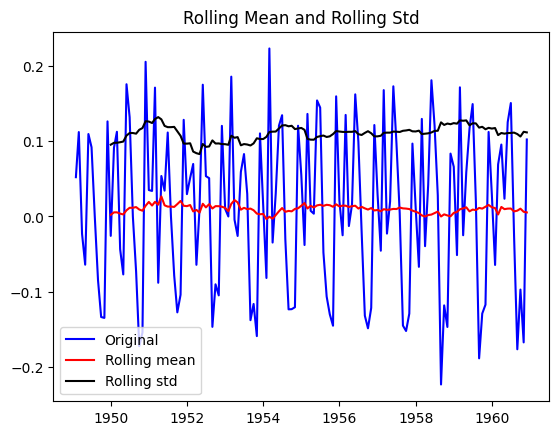

In [ ]:
plt.plot(diff_data,color = 'blue',label = 'Original')
plt.plot(rolling_mean,color = 'red',label = 'Rolling mean')
plt.plot(rolling_std,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [ ]:
# result=adfuller(diff_data["#Passengers"])
result[1]

0.991880243437641

In [ ]:
# let's consider the above data as stationary as we don't want to loose more data also we got the Marginal P value

In [ ]:
# Thus we got the differencing order(d=1)

In [ ]:
#model Implementaion


In [ ]:
log_df

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
# let's split the data for training  and testing
train=log_df.iloc[:120,:] # !0 year for training
test=log_df.iloc[120:,:]  # 2 year for testing


In [ ]:
train

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1958-08-01,6.224558
1958-09-01,6.001415
1958-10-01,5.883322


In [ ]:
test

,#Passengers
Month,
1959-01-01,5.886104
1959-02-01,5.834811
1959-03-01,6.006353
1959-04-01,5.981414
1959-05-01,6.040255
1959-06-01,6.156979
1959-07-01,6.306275
1959-08-01,6.326149
1959-09-01,6.137727


# ARIMA- Auto Regressive Integrated Movaing Average

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

### P (Auto-Regressive - AR)

* Controls how many past values the model should look at to make predictions.

* Example: If P = 2, the model uses the last 2 months’ data to predict the next one.

###D (Differencing - I)

* The number of times we subtract the previous value to make data stationary.
* Example: If D = 1, the model uses the 1st difference of the data to remove trends.

###Q (Moving Average - MA)

* Determines how many past forecast errors the model should consider to improve predictions.
* Example: If Q = 1, the model adjusts based on the error from the previous prediction.

* P = How much of the past you add
* D = How much trend you remove
* Q = How much you correct for mistakes

In [ ]:
model=ARIMA(train,order=(1,1,2))  # order of Arima (p = ?,d=1,q=?)  # let's take random order as of

In [ ]:
model=model.fit()

In [ ]:
log_df["Arima_Prediction"]= model.predict(start = len(train), end= len(train)+len(test)-1)

In [ ]:
log_df

,#Passengers,Arima_Prediction
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,NaN
1949-04-01,4.859812,NaN
1949-05-01,4.795791,NaN
...,...,...
1960-08-01,6.406880,5.912387
1960-09-01,6.230481,5.912387
1960-10-01,6.133398,5.912387


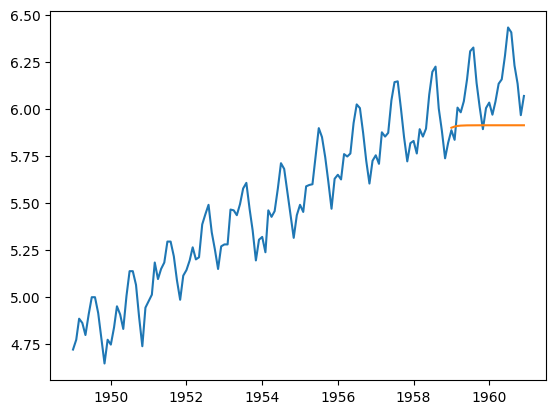

In [ ]:
plt.plot(log_df)

In [ ]:
# not getting good Predictions as not taken optimal pdq values thus using itertool to get it.

The itertools.product() function in Python is used to find the Cartesian product of input iterables.
Think of it as generating all possible combinations of items from multiple lists.

In [ ]:
# we will use here itertools to get the optimal value of p,d,q
import itertools

p=range(1,8)
d=range(1,2)
q=range(1,8)

pdq_combination=list(itertools.product(p,d,q))
pdq_combination


[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [ ]:
len(pdq_combination)

49

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = []
order1 =[]
for pdq in pdq_combination:
    model = ARIMA(train, order = pdq)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train), end= len(train)+len(test)-1)
    error = np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse, columns=['RMSE'])


In [ ]:
results.sort_values(by='RMSE',ascending=True)

,RMSE
"(5, 1, 4)",0.145288
"(7, 1, 7)",0.157977
"(6, 1, 4)",0.159520
"(7, 1, 5)",0.172645
"(7, 1, 4)",0.175933
"(7, 1, 2)",0.185339
"(7, 1, 3)",0.185972
"(5, 1, 5)",0.187577
"(6, 1, 5)",0.193137
"(6, 1, 6)",0.193694


In [ ]:
# From the Above code we found the best parameter is (5,1,4) for pdq

# Auto-Arima

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
order=auto_arima(log_df['#Passengers']) # helping to pick the best model based on my data
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                 152.202
Date:                Sun, 09 Feb 2025   AIC                           -286.405
Time:                        04:31:15   BIC                           -259.739
Sample:                    01-01-1949   HQIC                          -275.569
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0126      0.002      6.329      0.000       0.009       0.016
ar.L1          0.2948      0.115      2.560      0.010       0.069       0.520
ar.L2         -0.3853      0.131     -2.948      0.003      -0.641      -0.129
ar.L3          0.4467      0.095      4.706      0.000       0.261       0.633
ar.L4         -0.5698      0.117     -4.855      0.000      -0.800      -0.340
ma.L1         -0.2951      0.158     -1.867      0.062      -0.605       0.015
ma.L2          0.1137      0.176      0.645      0.519      -0.232       0.459
ma.L3         -0.7562      0.159     -4.742      0.000      -1.069      -0.444
sigma2         0.0073      0.001      5.357      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.75   Prob(JB):                         0.43
Heteroskedasticity (H):               1.27   Skew:                             0.17
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(train,order=(5,1,4))# From the Above code we found the best parameter is (5,1,4) for pdq

In [ ]:
model=model.fit()

In [ ]:
log_df["Arima_Prediction"]= model.predict(start = len(train), end= len(train)+len(test)-1)

In [ ]:
log_df

,#Passengers,Arima_Prediction
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,NaN
1949-04-01,4.859812,NaN
1949-05-01,4.795791,NaN
...,...,...
1960-08-01,6.406880,6.094125
1960-09-01,6.230481,6.036217
1960-10-01,6.133398,5.953707


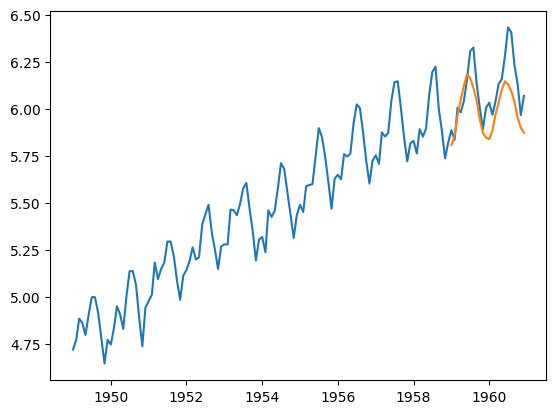

In [ ]:
plt.plot(log_df)

In [ ]:
# implementation of Sarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
s_model=SARIMAX(train,order=(5,1,4),seasonal_order=(5,1,4,12)) #(p,d,q,s)# seasonality=12

In [ ]:
s_model=s_model.fit()

In [ ]:
log_df["Sarima_Prediction"]= s_model.predict(start = len(train), end= len(train)+len(test)-1)

In [ ]:
log_df

,#Passengers,Arima_Prediction,Sarima_Prediction
Month,,,
1949-01-01,4.718499,NaN,NaN
1949-02-01,4.770685,NaN,NaN
1949-03-01,4.882802,NaN,NaN
1949-04-01,4.859812,NaN,NaN
1949-05-01,4.795791,NaN,NaN
...,...,...,...
1960-08-01,6.406880,6.094125,6.344503
1960-09-01,6.230481,6.036217,6.173017
1960-10-01,6.133398,5.953707,6.031526


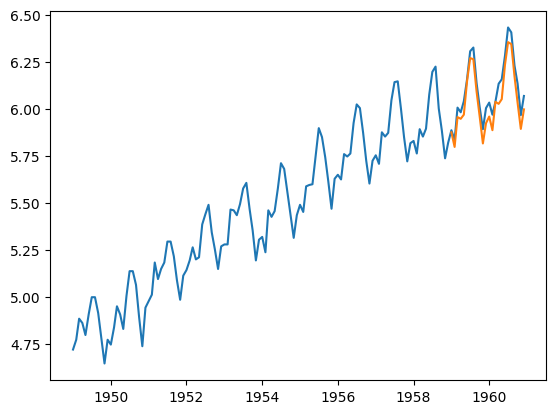

In [ ]:
plt.plot(log_df["#Passengers"])
plt.plot(log_df["Sarima_Prediction"])


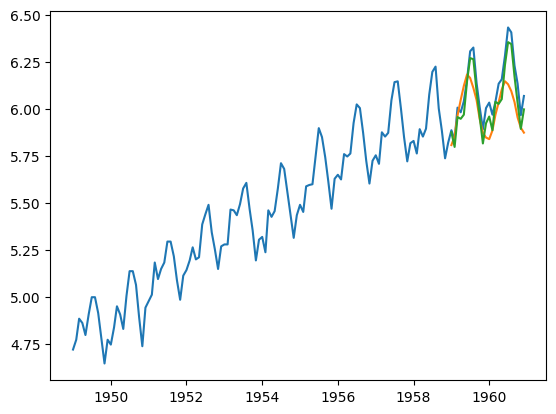

In [ ]:
plt.plot(log_df)

In [ ]:
# forecast
future=s_model.forecast(steps=60) # Next 5 years

In [ ]:
future

,predicted_mean
1959-01-01,5.874818
1959-02-01,5.797167
1959-03-01,5.955906
1959-04-01,5.946827
1959-05-01,5.968755
1959-06-01,6.147090
1959-07-01,6.269916
1959-08-01,6.264128
1959-09-01,6.091958
1959-10-01,5.958604


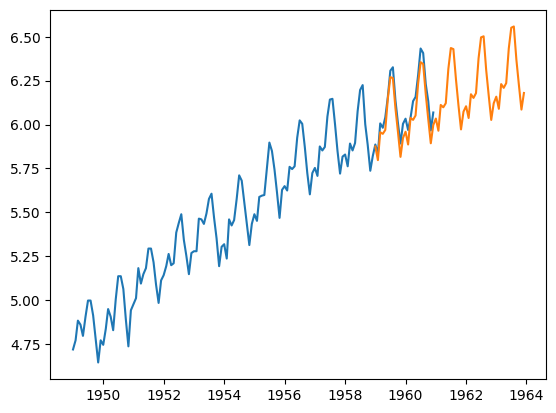

In [ ]:
plt.plot(log_df["#Passengers"])
plt.plot(future)

In [ ]:
future

,predicted_mean
1959-01-01,5.874818
1959-02-01,5.797167
1959-03-01,5.955906
1959-04-01,5.946827
1959-05-01,5.968755
1959-06-01,6.147090
1959-07-01,6.269916
1959-08-01,6.264128
1959-09-01,6.091958
1959-10-01,5.958604


* np.exp() reversed the log to get actual passenger numbers.
* round() cleaned up the number to a whole passenger count.

In [ ]:
np.exp(5.874818)

355.9598700786599

In [ ]:
round(np.exp(future)) # Actual Values of passengers

,predicted_mean
1959-01-01,356.0
1959-02-01,329.0
1959-03-01,386.0
1959-04-01,383.0
1959-05-01,391.0
1959-06-01,467.0
1959-07-01,528.0
1959-08-01,525.0
1959-09-01,442.0
1959-10-01,387.0
